In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

In [3]:
x = torch.rand(3,2)
x

tensor([[0.4485, 0.7304],
        [0.9393, 0.2693],
        [0.2221, 0.7014]])

In [5]:
y = torch.ones(x.size())
y

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [7]:
z = x+y
z

tensor([[1.4485, 1.7304],
        [1.9393, 1.2693],
        [1.2221, 1.7014]])

In [8]:
z[0]

tensor([1.4485, 1.7304])

In [9]:
z[:,:1]

tensor([[1.4485],
        [1.9393],
        [1.2221]])

In [10]:
z.add(1)

tensor([[2.4485, 2.7304],
        [2.9393, 2.2693],
        [2.2221, 2.7014]])

In [11]:
z

tensor([[1.4485, 1.7304],
        [1.9393, 1.2693],
        [1.2221, 1.7014]])

In [12]:
z.add_(1)

tensor([[2.4485, 2.7304],
        [2.9393, 2.2693],
        [2.2221, 2.7014]])

In [13]:
z

tensor([[2.4485, 2.7304],
        [2.9393, 2.2693],
        [2.2221, 2.7014]])

In [14]:
z.size()

torch.Size([3, 2])

In [15]:
z.resize(2,3)

D:\Anaconda3\lib\site-packages\torch\tensor.py:263: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[2.4485, 2.7304, 2.9393],
        [2.2693, 2.2221, 2.7014]])

In [16]:
z

tensor([[2.4485, 2.7304],
        [2.9393, 2.2693],
        [2.2221, 2.7014]])

In [17]:
z.resize_(2,3)

tensor([[2.4485, 2.7304, 2.9393],
        [2.2693, 2.2221, 2.7014]])

In [18]:
z

tensor([[2.4485, 2.7304, 2.9393],
        [2.2693, 2.2221, 2.7014]])

In [19]:
a= np.random.rand(4,3)

In [20]:
a

array([[0.14734093, 0.27110083, 0.39646151],
       [0.63672403, 0.14670363, 0.09081527],
       [0.63444073, 0.53758547, 0.55657065],
       [0.42073377, 0.54443154, 0.87574972]])

In [21]:
b = torch.from_numpy(a)

In [22]:
b

tensor([[0.1473, 0.2711, 0.3965],
        [0.6367, 0.1467, 0.0908],
        [0.6344, 0.5376, 0.5566],
        [0.4207, 0.5444, 0.8757]], dtype=torch.float64)

In [23]:
b.numpy()

array([[0.14734093, 0.27110083, 0.39646151],
       [0.63672403, 0.14670363, 0.09081527],
       [0.63444073, 0.53758547, 0.55657065],
       [0.42073377, 0.54443154, 0.87574972]])

In [24]:
a

array([[0.14734093, 0.27110083, 0.39646151],
       [0.63672403, 0.14670363, 0.09081527],
       [0.63444073, 0.53758547, 0.55657065],
       [0.42073377, 0.54443154, 0.87574972]])

In [107]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [108]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [109]:
trainset = datasets.MNIST('MNIST_data/', download=True, transform = transform)

In [110]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [111]:
testset = datasets.MNIST('MNIST_data/', download=False, transform = transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [36]:
dataiter = iter(trainloader)
images,label = dataiter.next()

In [45]:
print(label[1])

tensor(5)


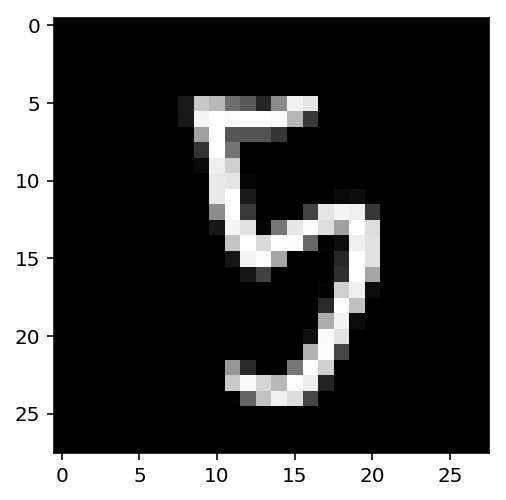

In [42]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

tensor(4)


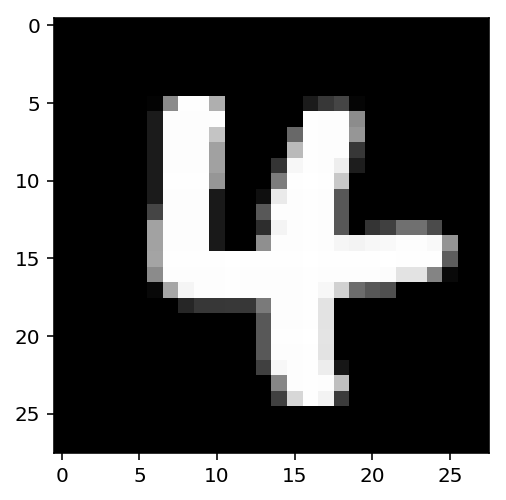

In [141]:
testdataiter = iter(testloader)
images_test,label_test = testdataiter.next()
print(label_test[1])
plt.imshow(images_test[1].numpy().squeeze(), cmap='Greys_r')

In [1]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

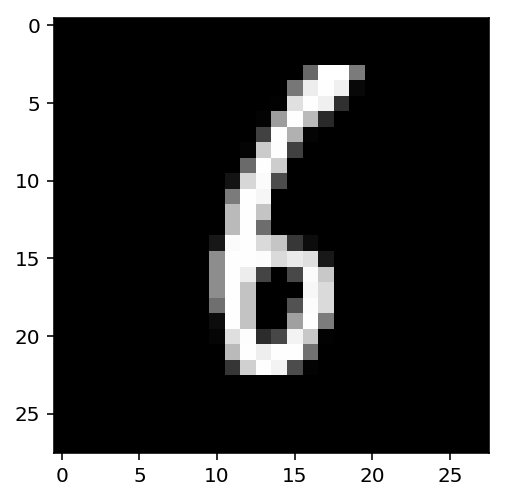

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [5]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [13]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x , dim =1)
        return x
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [14]:
print(model.fc1.weight)

Parameter containing:
tensor([[ 0.0270, -0.0021, -0.0067,  ...,  0.0029,  0.0039,  0.0145],
        [ 0.0208,  0.0124,  0.0082,  ...,  0.0349, -0.0260, -0.0210],
        [-0.0144, -0.0304,  0.0225,  ...,  0.0182,  0.0128,  0.0091],
        ...,
        [-0.0112, -0.0250, -0.0305,  ..., -0.0263, -0.0021, -0.0159],
        [ 0.0224,  0.0110, -0.0164,  ...,  0.0087,  0.0017, -0.0087],
        [-0.0084, -0.0252, -0.0341,  ..., -0.0190, -0.0210, -0.0347]],
       requires_grad=True)


In [15]:
print(model.fc1.bias)

Parameter containing:
tensor([ 0.0026,  0.0190,  0.0170,  0.0302, -0.0139, -0.0338,  0.0017, -0.0157,
        -0.0101,  0.0067, -0.0202, -0.0327, -0.0183,  0.0111,  0.0054, -0.0225,
         0.0139, -0.0093, -0.0261, -0.0273, -0.0253,  0.0080, -0.0007, -0.0298,
         0.0187,  0.0169, -0.0092, -0.0096, -0.0199,  0.0005, -0.0038,  0.0015,
        -0.0247, -0.0309, -0.0205, -0.0288, -0.0099, -0.0102, -0.0092, -0.0099,
         0.0308, -0.0134,  0.0167, -0.0333,  0.0010,  0.0232, -0.0014, -0.0316,
         0.0025,  0.0271,  0.0039, -0.0143, -0.0267, -0.0096,  0.0295,  0.0268,
        -0.0019, -0.0143,  0.0060, -0.0129,  0.0332, -0.0237,  0.0192, -0.0118,
         0.0159,  0.0291,  0.0090, -0.0142,  0.0232, -0.0212,  0.0245,  0.0017,
         0.0253, -0.0178,  0.0324, -0.0068,  0.0313, -0.0208,  0.0183,  0.0312,
         0.0086, -0.0340, -0.0267,  0.0179, -0.0106, -0.0004,  0.0232,  0.0142,
         0.0106,  0.0082,  0.0091, -0.0107,  0.0020, -0.0284, -0.0168,  0.0067,
         0.0286,  

In [16]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [17]:
model.fc1.weight.data.normal_(std = 0.01)

tensor([[ 0.0004, -0.0098,  0.0105,  ..., -0.0121, -0.0078,  0.0041],
        [ 0.0052,  0.0018, -0.0002,  ...,  0.0148,  0.0004, -0.0082],
        [ 0.0009,  0.0172, -0.0003,  ..., -0.0070, -0.0076, -0.0110],
        ...,
        [-0.0291,  0.0065,  0.0150,  ..., -0.0124, -0.0136, -0.0090],
        [-0.0020,  0.0032, -0.0068,  ...,  0.0009, -0.0052,  0.0137],
        [-0.0062,  0.0151,  0.0072,  ..., -0.0026,  0.0013, -0.0042]])

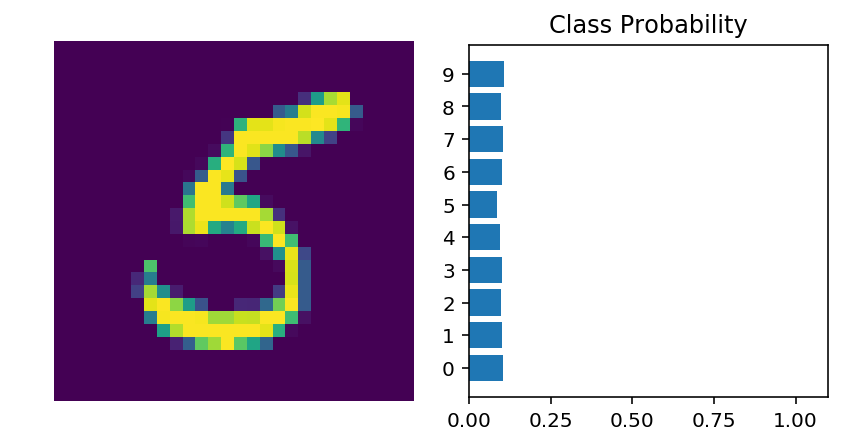

In [30]:
images, labels = next(iter(trainloader))

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(images.shape[0], 1, 784)
# or images.resize_(images.shape[0], 1, 784) to not automatically get batch size

# Forward pass through the network

ps = model.forward(images[0,:])

helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


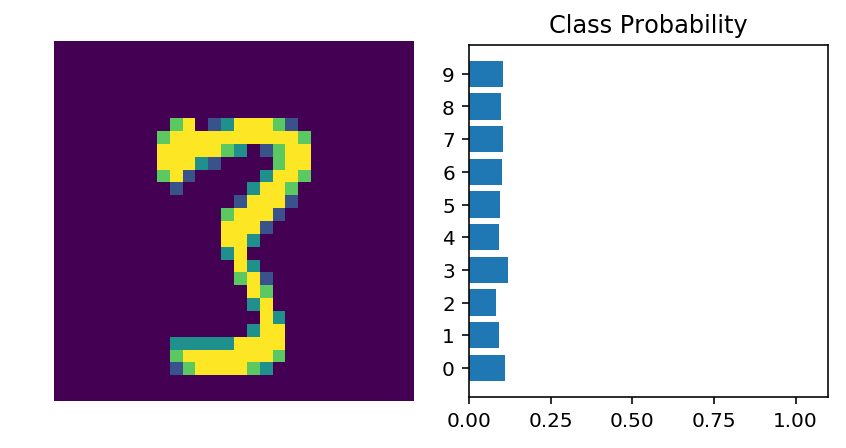

In [38]:
input_size= 784
hidden_size =[128,64]
output_size = 10
model =nn.Sequential(nn.Linear(input_size,hidden_size[0]),
                     nn.ReLU(), 
                     nn.Linear(hidden_size[0],hidden_size[1]),
                     nn.ReLU(),
                    nn.Linear(hidden_size[1],output_size),
                     nn.Softmax(dim=1))

print(model)
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [42]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_size[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_size[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [43]:
model.fc2

Linear(in_features=128, out_features=64, bias=True)

Exercise: Build a network to classify the MNIST images with three hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.

In [44]:
input_size= 784
hidden_size =[400,200,100]
output_size = 10

In [45]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_size[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_size[1], hidden_size[2])),
                      ('relu3', nn.ReLU()),
                      ('output', nn.Linear(hidden_size[2], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax()
)

# Training Neural Networks

The network we built in the previous part isn't so smart, it doesn't know anything about our handwritten digits. Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. For example, images of handwritten digits to class probabilities. The power of neural networks is that we can train them to approximate this function, and basically any function given enough data and compute time.

<img src="assets/function_approx.png" width=500px>

At first the network is naive, it doesn't know the function mapping the inputs to the outputs. We train the network by showing it examples of real data, then adjusting the network parameters such that it approximates this function.

To find these parameters, we need to know how poorly the network is predicting the real outputs. For this we calculate a **loss function** (also called the cost), a measure of our prediction error. For example, the mean squared loss is often used in regression and binary classification problems

$$
\ell = \frac{1}{2n}\sum_i^n{\left(y_i - \hat{y}_i\right)^2}
$$

where $n$ is the number of training examples, $y_i$ are the true labels, and $\hat{y}_i$ are the predicted labels.

By minimizing this loss with respect to the network parameters, we can find configurations where the loss is at a minimum and the network is able to predict the correct labels with high accuracy. We find this minimum using a process called **gradient descent**. The gradient is the slope of the loss function and points in the direction of fastest change. To get to the minimum in the least amount of time, we then want to follow the gradient (downwards). You can think of this like descending a mountain by following the steepest slope to the base.

<img src='assets/gradient_descent.png' width=350px>

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import helper

In [47]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.6103,  0.0383],
        [-1.0211,  0.6068]], requires_grad=True)


In [48]:
y = x**2

print(y)

tensor([[0.3724, 0.0015],
        [1.0427, 0.3682]], grad_fn=<PowBackward0>)


In [49]:
print(y.grad_fn)

In [50]:
z = y.mean()
print(z)

tensor(0.4462, grad_fn=<MeanBackward1>)


In [52]:
print(x.grad)

None


In [53]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.3051,  0.0192],
        [-0.5106,  0.3034]])
tensor([[-0.3051,  0.0192],
        [-0.5106,  0.3034]], grad_fn=<DivBackward0>)


In [54]:
print(y.grad)

None


In [56]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [57]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [64]:
print("Before",model.fc1.weight)

images,label = next(iter(trainloader))

images.resize_(images.shape[0],784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output,label)
loss.backward()

print("Gradient =",model.fc1.weight.grad)
optimizer.step()


Before Parameter containing:
tensor([[ 0.0029, -0.0208, -0.0286,  ...,  0.0036, -0.0006, -0.0290],
        [-0.0257, -0.0034,  0.0030,  ..., -0.0156, -0.0003,  0.0257],
        [ 0.0258, -0.0213, -0.0123,  ...,  0.0217, -0.0002, -0.0211],
        ...,
        [ 0.0165,  0.0102,  0.0103,  ..., -0.0206,  0.0199,  0.0212],
        [ 0.0032,  0.0100, -0.0244,  ..., -0.0045, -0.0308,  0.0035],
        [ 0.0231, -0.0326,  0.0300,  ..., -0.0105, -0.0156, -0.0244]],
       requires_grad=True)
Gradient = tensor([[-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0042,  0.0042,  0.0042,  ...,  0.0042,  0.0042,  0.0042],
        [-0.0039, -0.0039, -0.0039,  ..., -0.0039, -0.0039, -0.0039]])


In [65]:
print("After",model.fc1.weight)

After Parameter containing:
tensor([[ 0.0029, -0.0208, -0.0286,  ...,  0.0036, -0.0006, -0.0290],
        [-0.0257, -0.0034,  0.0030,  ..., -0.0156, -0.0003,  0.0257],
        [ 0.0258, -0.0213, -0.0123,  ...,  0.0217, -0.0001, -0.0211],
        ...,
        [ 0.0165,  0.0102,  0.0104,  ..., -0.0206,  0.0199,  0.0212],
        [ 0.0032,  0.0100, -0.0244,  ..., -0.0045, -0.0309,  0.0035],
        [ 0.0232, -0.0326,  0.0300,  ..., -0.0105, -0.0155, -0.0244]],
       requires_grad=True)


In [66]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [67]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 2.2934
Epoch: 1/3...  Loss: 2.2684
Epoch: 1/3...  Loss: 2.2452
Epoch: 1/3...  Loss: 2.2255
Epoch: 1/3...  Loss: 2.2005
Epoch: 1/3...  Loss: 2.1741
Epoch: 1/3...  Loss: 2.1444
Epoch: 1/3...  Loss: 2.1126
Epoch: 1/3...  Loss: 2.0746
Epoch: 1/3...  Loss: 2.0398
Epoch: 1/3...  Loss: 1.9902
Epoch: 1/3...  Loss: 1.9552
Epoch: 1/3...  Loss: 1.8937
Epoch: 1/3...  Loss: 1.8309
Epoch: 1/3...  Loss: 1.7865
Epoch: 1/3...  Loss: 1.7147
Epoch: 1/3...  Loss: 1.6568
Epoch: 1/3...  Loss: 1.5999
Epoch: 1/3...  Loss: 1.5082
Epoch: 1/3...  Loss: 1.4531
Epoch: 1/3...  Loss: 1.3850
Epoch: 1/3...  Loss: 1.3157
Epoch: 1/3...  Loss: 1.2557
Epoch: 2/3...  Loss: 0.6495
Epoch: 2/3...  Loss: 1.1535
Epoch: 2/3...  Loss: 1.1063
Epoch: 2/3...  Loss: 1.0614
Epoch: 2/3...  Loss: 1.0166
Epoch: 2/3...  Loss: 0.9641
Epoch: 2/3...  Loss: 0.9469
Epoch: 2/3...  Loss: 0.9291
Epoch: 2/3...  Loss: 0.8910
Epoch: 2/3...  Loss: 0.8582
Epoch: 2/3...  Loss: 0.8346
Epoch: 2/3...  Loss: 0.7832
Epoch: 2/3...  Loss:

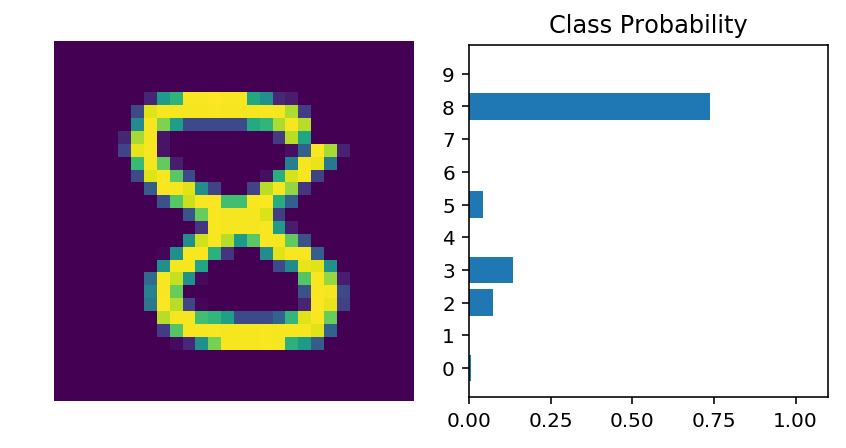

In [68]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)

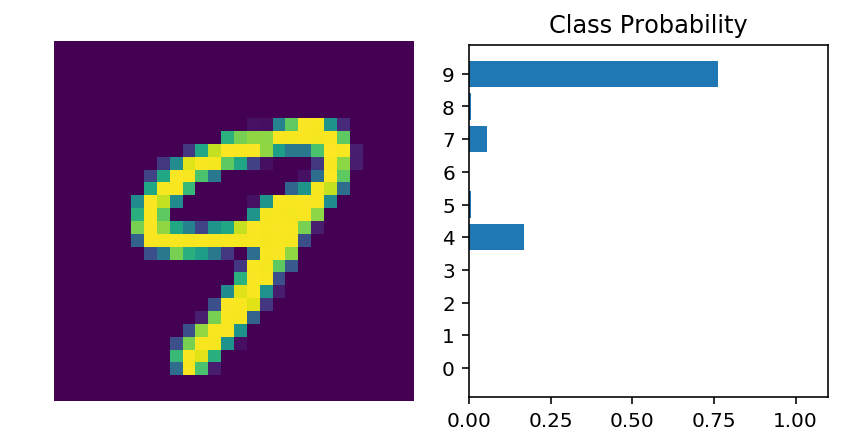

In [74]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn on gradients 
logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)